## 2do Parcial - Simulación Computacional 2019-I

## 1. 
Se tiene un sistema de línea de espera con un servidor y capacidad infinita (Modelo de Colas G/G/1) (Ver [Presentación](https://docs.google.com/presentation/d/17sB_GJVIu0vJYJXovaJNdLuBMENwHMW2L9Sa58P89Uw) ), en el cual tanto los tiempos de llegada entre clientes, así como los tiempos de atención del servidor se comportan como  variables aleatorias generadas de distribuciones de probabilidad exponenciales, en donde en promedio llegan A clientes por minuto al sistema y el servidor atiende en promedio B clientes por minuto. La simulación inicia en el tiempo $t=0$ y se deja de permitir el ingreso de mas clientes en el sistema en el tiempo $T=100$.

Para analizar el sistema Ud. debe usar la implementación de acuerdo con el Modelo de Colas G/G/1 visto en clase (diapositivas 42 y 43 [Presentación](https://docs.google.com/presentation/d/17sB_GJVIu0vJYJXovaJNdLuBMENwHMW2L9Sa58P89Uw) ). 

Para la generación de las variables aleatorias con distribución exponencial debe usar el método de la inversión para variables aleatorias continuas usando generadores congruenciales mixtos. _Ayuda: El método de inversión para variables aleatorias continuas debe usar la función inversa $F^{-1}(p)$ de la distribución de probabilidad acumulada de la distribución exponencial en donde el valor $p$ proviene del generador congruencial mixto_.

Para la generación de las variables aleatorias de los tiempos entre las llegadas de clientes (variable aleatoria $X$) debe generar variables aleatorias continuas de una distribución exponencial con $\lambda = A$ a partir de un generador congruencial Borland C/C++ (i.e. $a = 22695477$, $c = 1$, $m=2^{32}$) y semilla $X_0 = 987654321$.

Para la generación de las variables aleatorias de los tiempos de atención del servidor (variable aleatoria $Y$) debe generar variables aleatorias continuas de una distribución exponencial con $\lambda = B$ a partir de un generador congruencial RANDU (i.e. $a = 65539$, $c = 0$, $m=2^{31}$) y semilla $X_0 = 123456789$.

Con su implementación para $A=3$ y $B=7$ por favor responda lo siguiente:

1. Tiempo promedio de los clientes en el sistema.
2. Tiempo promedio de los clientes en la cola.
3. Tiempo transcurrido desde $T$ hasta que el último cliente abandona el sistema.
4. Número máximo de clientes en el sistema durante la simulación.

In [33]:
import math as m
import numpy as np

Xa=987654321
Xa2=123456789

A=3
B=7

def generarU():
    global Xa
    a=22695477
    c=1
    m=2**32
    Xo=Xa
    Xn=(a*Xo+c)%m
    ui=Xn/m
    Xa=Xn
    return ui

def generarU2():
    global Xa2
    a=65539
    c=0
    m=2**31
    Xo=Xa2
    Xn=(a*Xo+c)%m
    ui=Xn/m
    Xa2=Xn
    return ui

def exponencial(lamda):
    if lamda==A:
        U=generarU()
        return (-1/lamda)*m.log(1-U)
    if lamda==B:
        U=generarU2()
        return (-1/lamda)*m.log(1-U)

t=0
tsuc=0
Nll=0
Ns=0
n=0
Tsuc_tLL=2**16
Tsuc_ts=2**16
M=2**16
LL=np.zeros(1000)
S=np.zeros(1000)
Serv=np.zeros(1000)
T=100
nmax=0

def llegada(tsuc):
    global n,Nll,Tsuc_tLL,Tsuc_ts,t,Ns,nmax
    t=tsuc
    n=n+1
    if n>nmax:
        nmax=n
    Nll=Nll+1
    LL[Nll]=t
    X=exponencial(A) 
    if t+X<T:
        Tsuc_tLL=t+X
    if n==1:
        Y=exponencial(B)
        Tsuc_ts=t+Y
        Serv[Ns+1]=Y

def servidor(tsuc):
    global t,n,Tsuc_tLL,Tsuc_ts,Ns
    t=tsuc
    n=n-1
    Ns=Ns+1
    S[Ns]=t
    if n>0:
        Y= exponencial(B) # generar G
        Tsuc_ts=t+Y
        Serv[Ns]=Y


X=exponencial(A)
#print(X)
if(X>T):
    Tp=0
    t_med_sistema=0
    t_med_cola=0
else:
    llegada(X)
    #print("tll, ",Tsuc_tLL)
    #print("ts, ",Tsuc_ts)
    #print("M, ",M)
    while(Tsuc_tLL!=M or Tsuc_ts!=M):
        if Tsuc_tLL<Tsuc_ts:
            tsuc=Tsuc_tLL
            Tsuc_tLL=M
            llegada(tsuc)
        if Tsuc_ts<Tsuc_tLL:
            tsuc=Tsuc_ts
            Tsuc_ts=M
            servidor(tsuc)
    Tp=max(0,t-T)
    acumulado1=0
    acumulado2=0
    ind=0
    while(ind<Nll):
        acumulado1=acumulado1+S[ind]-LL[ind]
        acumulado2=acumulado2+S[ind]-LL[ind]-Serv[ind]
        ind=ind+1
    t_med_sistema=acumulado1/Nll
    t_med_cola=acumulado2/Nll

print("Tiempo promedio de los clientes en el sistema: ",t_med_sistema)
print("Tiempo promedio de los clientes en la cola: ",t_med_cola)
print("Tiempo transcurrido desde  T  hasta que el último cliente abandona el sistema: ",Tp)
print("Número máximo de clientes en el sistema durante la simulación: ",nmax)

Tiempo promedio de los clientes en el sistema:  0.2982541579990701
Tiempo promedio de los clientes en la cola:  0.19510923579434006
Tiempo transcurrido desde  T  hasta que el último cliente abandona el sistema:  0
Número máximo de clientes en el sistema durante la simulación:  9


## 2.
Usando el ejemplo del modelo de simulación basada en agentes del comportamiento de hormigas para buscar comida y llevarla al nido de NetLogo en su versión online "Sample Models/Biology/Ants" (http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Biology/Ants.nlogo), modifique el código de tal forma que:

1. La feromona dejada por las hormigas al encontrar comida en su rastro sea de 15.
2. El intervalo de la cantidad de la feromona para que una hormiga siga la dirección del rastro sea entre 0.025 y 4.
3. ¿Qué cambio en relación al modelo original respecto al comportamiento de las hormigas y su objetivo de encontrar comida y llevarla al nido?

In [ ]:
;;;;;;;;;;;;;;;;;;;;;;;;
;;;codigo modificado;;;;
;;;;;;;;;;;;;;;;;;;;;;;;

patches-own [
  chemical             ;; amount of chemical on this patch
  food                 ;; amount of food on this patch (0, 1, or 2)
  nest?                ;; true on nest patches, false elsewhere
  nest-scent           ;; number that is higher closer to the nest
  food-source-number   ;; number (1, 2, or 3) to identify the food sources
]

;;;;;;;;;;;;;;;;;;;;;;;;
;;; Setup procedures ;;;
;;;;;;;;;;;;;;;;;;;;;;;;

to setup
  clear-all
  set-default-shape turtles "bug"
  create-turtles population
  [ set size 2         ;; easier to see
    set color red  ]   ;; red = not carrying food
  setup-patches
  reset-ticks
end

to setup-patches
  ask patches
  [ setup-nest
    setup-food
    recolor-patch ]
end

to setup-nest  ;; patch procedure
  ;; set nest? variable to true inside the nest, false elsewhere
  set nest? (distancexy 0 0) < 5
  ;; spread a nest-scent over the whole world -- stronger near the nest
  set nest-scent 200 - distancexy 0 0
end

to setup-food  ;; patch procedure
  ;; setup food source one on the right
  if (distancexy (0.6 * max-pxcor) 0) < 5
  [ set food-source-number 1 ]
  ;; setup food source two on the lower-left
  if (distancexy (-0.6 * max-pxcor) (-0.6 * max-pycor)) < 5
  [ set food-source-number 2 ]
  ;; setup food source three on the upper-left
  if (distancexy (-0.8 * max-pxcor) (0.8 * max-pycor)) < 5
  [ set food-source-number 3 ]
  ;; set "food" at sources to either 1 or 2, randomly
  if food-source-number > 0
  [ set food one-of [1 2] ]
end

to recolor-patch  ;; patch procedure
  ;; give color to nest and food sources
  ifelse nest?
  [ set pcolor violet ]
  [ ifelse food > 0
    [ if food-source-number = 1 [ set pcolor cyan ]
      if food-source-number = 2 [ set pcolor sky  ]
      if food-source-number = 3 [ set pcolor blue ] ]
    ;; scale color to show chemical concentration
    [ set pcolor scale-color green chemical 0.1 5 ] ]
end

;;;;;;;;;;;;;;;;;;;;;
;;; Go procedures ;;;
;;;;;;;;;;;;;;;;;;;;;

to go  ;; forever button
  ask turtles
  [ if who >= ticks [ stop ] ;; delay initial departure
    ifelse color = red
    [ look-for-food  ]       ;; not carrying food? look for it
    [ return-to-nest ]       ;; carrying food? take it back to nest
    wiggle
    fd 1 ]
  diffuse chemical (15 / 100)
  ask patches
  [ set chemical chemical * (100 - 10) / 100  ;; slowly evaporate chemical
    recolor-patch ]
  tick
end

to return-to-nest  ;; turtle procedure
  ifelse nest?
  [ ;; drop food and head out again
    set color red
    rt 180 ]
  [ set chemical chemical + 60  ;; drop some chemical
    uphill-nest-scent ]         ;; head toward the greatest value of nest-scent
end

to look-for-food  ;; turtle procedure
  if food > 0
  [ set color orange + 1     ;; pick up food
    set food food - 1        ;; and reduce the food source
    rt 180                   ;; and turn around
    stop ]
  ;; go in the direction where the chemical smell is strongest
  if (chemical >= 0.05) and (chemical < 2)
  [ uphill-chemical ]
end

;; sniff left and right, and go where the strongest smell is
to uphill-chemical  ;; turtle procedure
  let scent-ahead chemical-scent-at-angle   0
  ;;El intervalo de la cantidad de la feromona para que una hormiga siga la dirección del rastro sea entre 0.025 y 4.
  let scent-right chemical-scent-at-angle  0.25
  let scent-left  chemical-scent-at-angle  4
  if (scent-right > scent-ahead) or (scent-left > scent-ahead)
  [ ifelse scent-right > scent-left
    [ rt 45 ]
    [ lt 45 ] ]
end

;; sniff left and right, and go where the strongest smell is
to uphill-nest-scent  ;; turtle procedure
  let scent-ahead nest-scent-at-angle   0
  ;;El intervalo de la cantidad de la feromona para que una hormiga siga la dirección del rastro sea entre 0.025 y 4.
  let scent-right nest-scent-at-angle  0.25
  let scent-left  nest-scent-at-angle  4
  if (scent-right > scent-ahead) or (scent-left > scent-ahead)
  [ ifelse scent-right > scent-left
    [ rt 45 ]
    [ lt 45 ] ]
end

to wiggle  ;; turtle procedure
  rt random 40
  lt random 40
  if not can-move? 1 [ rt 180 ]
end

to-report nest-scent-at-angle [angle]
  let p patch-right-and-ahead angle 1
  if p = nobody [ report 0 ]
  report [nest-scent] of p
end

to-report chemical-scent-at-angle [angle]
  let p patch-right-and-ahead angle 1
  if p = nobody [ report 0 ]
  report [chemical] of p
end



# 3. ¿Qué cambio en relación al modelo original respecto al comportamiento de las hormigas y su objetivo de encontrar comida y 
#    llevarla al nido?

# En el modelo original las hormigas al no exparcir tanto su feromona la concentracion que habia permitia que las hormigas 
# pudieran encontrar y llevar la comida al nido mucho mas rapido.

# Al realizar los cambios ya las hormigas estan dejando demasiada feromona y a limitar la direccion de rastro entre las 
# hormigas hacia que se exparcieran por todo el mundo sin permitir que pudieran hacer un camino fijo para llevar 
# la comida al nido.

## 3.
Tomando en cuenta la ecuación para actualizar la feromona en  (Ver Diap. 17 [Presentación](http://mat.uab.es/~alseda/MasterOpt/ACO_Intro.pdf) ), en el 

\begin{align*}
\tau _{i,j}= (1-\rho )\tau _{i,j}+\sum_{k=1}^{m}\Delta \tau_{i,j}^{k}
\end{align*}

donde 

$\tau _{i,j}$ es la cantidad de feromona en un arco (vertice) dado entre los nodos $i,j$

$\rho$ es la tasa de evaporación de la feromona

$m$ es el número de hormigas

$\Delta \tau_{i,j}^{k}$ es la cantidad de feromona depositada en el arco ($i,j$) por la $k$-ésima hormiga 

\begin{align*}
\Delta \tau_{i,j}^{k}=
\begin{cases}
1/L_k & \text{ si la hormiga }k\text{ viaja en el arco } i,j \\ 
0 & \text{ si no }
\end{cases}
\end{align*}

donde $L_k$ es la longitud (distancia) de la trayectoria de la $k$-ésima hormiga 

Implemente una función para la actualización de la feromona que reciba por parametros los valores $\tau _{i,j}$ y $\rho$, y el un arreglo de tamaño $m$ para cada uno de los $\Delta \tau_{i,j}^{k}$


In [49]:
import numpy as np
import random

T = 0.1 # Tji
p=0.06 # tasa de evaporacion
#array para los lk y valor de k
k = 1
lk = []
#matriz inicial
m = np.matrix([[0, 1, 0, 0], 
               [1, 0, 3, 2] , 
               [0, 3, 0, 1],
               [0, 2, 1, 0]])

caminos = []
for i in range(0,k):
    #tamaño de los caminos debe ser igual al de la matriz inicial
    m = np.zeros(shape=(4,4))
    tcamino = int(random.randrange(2,10))
    tij = 1
    count = 0
    count1 = 0
    while(count1 <4):
        tij = int(random.randrange(0,4))
        m[tij][count1] += 1
        count1+=1
        count = tij

    lk.append(m)
for i in lk:
    print (i)

[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]]


## 4.

Escriba el código en NetLogo que permita recibir por parámetro la longitud de lado para dibujar un hexagono, y  presente la captura de pantalla del resultado obtenido.

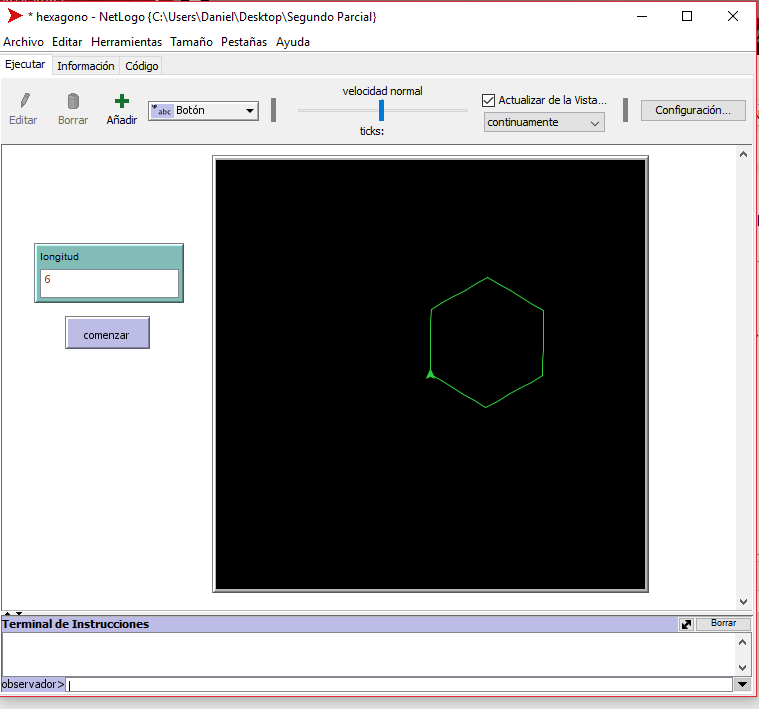

## 5.
Aplicando las reglas del juego de la vida de Conway para el siguiente entorno, ¿Cuál sería el estado del sistema luego de 5 iteraciones?
<img src="9x9grid.jpg" height="200" width="200">

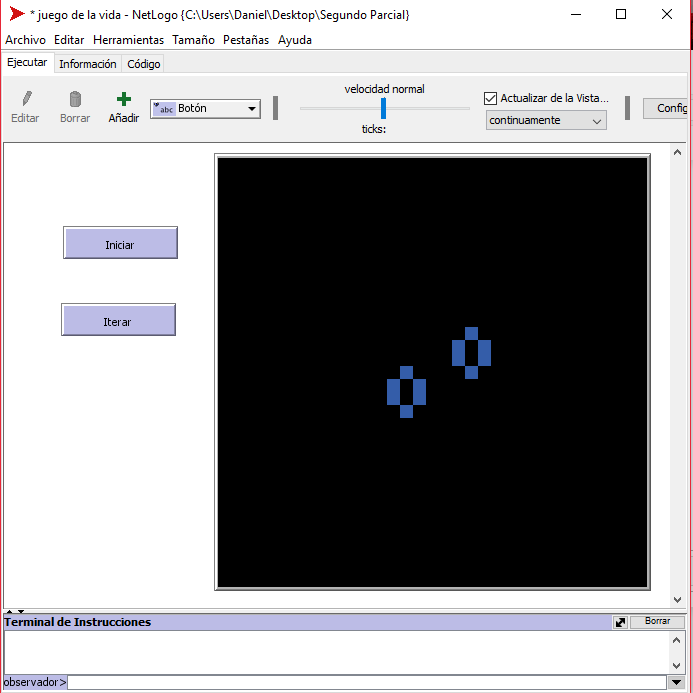

In [ ]:
patches-own [state]

to inicio
  ca
  ask patches [set pcolor black]
  ask patches [
    if (pxcor = 0 and pycor = 0)[
      set pcolor blue ]
    if (pxcor = 0 and pycor = 1)[
      set pcolor blue ]
    if (pxcor = 0 and pycor = 2)[
      set pcolor blue ]
    if (pxcor = 1 and pycor = 1)[
      set pcolor blue ]
    if (pxcor = 1 and pycor = 0)[
      set pcolor blue ]
    if (pxcor = 1 and pycor = -1)[
      set pcolor blue ]
    if (pxcor = 1 and pycor = -2)[
      set pcolor blue ]
    if (pxcor = -2 and pycor = 0)[
      set pcolor blue ]
    if (pxcor = -2 and pycor = -1)[
      set pcolor blue ]
    if (pxcor = -1 and pycor = -1)[
      set pcolor blue ]
    if (pxcor = -1 and pycor = -2)[
      set pcolor blue ]
    if (pxcor = 2 and pycor = 2)[
      set pcolor blue ]
    if (pxcor = 3 and pycor = 2)[
      set pcolor blue ]
    if (pxcor = 3 and pycor = 1)[
      set pcolor blue ]
    if (pxcor = 3 and pycor = 0)[
      set pcolor blue ]
  ]
end

to iterar
  ask patches
  [
    let cantidad_vecinos_vivos count neighbors with [pcolor = blue]
    set state pcolor
    if-else (pcolor = blue) [ ;If Im alive
      if (cantidad_vecinos_vivos < 2 or cantidad_vecinos_vivos > 3)[
        set state black ; Kill me
      ]
    ][ ;;else, I am dead
      if (cantidad_vecinos_vivos = 3) [
        set state blue
      ]
    ]
  ]
  ask patches
  [
    set pcolor state
  ]
end